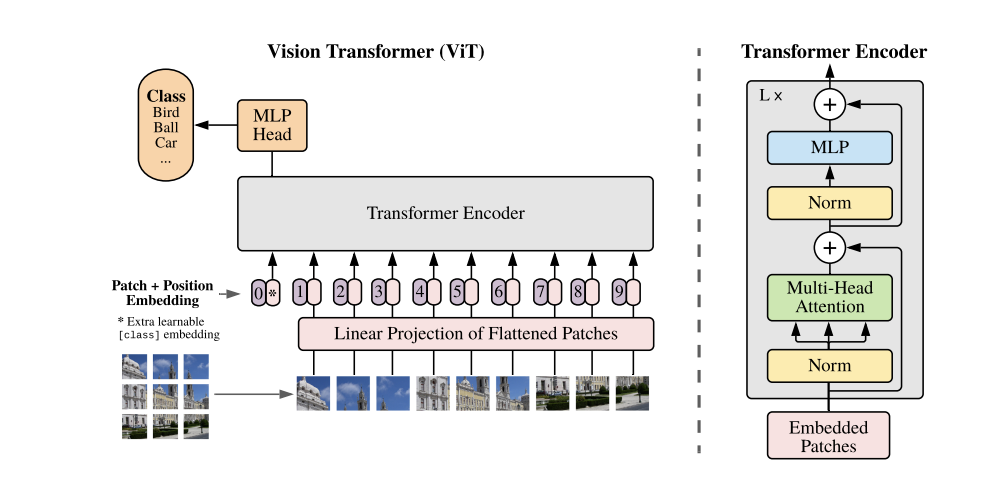

# Hiragana Alphabet

In [1]:
import os
unicode_to_class={}
class_to_unicode={}
unicodes=["3042", "3044", "3046", "3048", "304a", "304b", "304c", "304d", "304e", "304f", "3050", "3051", "3052", "3053", "3054", "3055", "3056", "3057", "3058", "3059", "305a", "305b", "305c", "305d", "305e", "305f", "3060", "3061", "3062", "3064", "3065", "3066", "3067", "3068", "3069", "306a", "306b", "306c", "306d", "306e", "306f", "3070", "3071", "3072", "3073", "3074", "3075", "3076", "3077", "3078", "3079", "307a", "307b", "307c", "307d", "307e", "307f", "3080", "3081", "3082", "3084", "3086", "3088", "3089", "308a", "308b", "308c", "308d", "308f", "3092", "3093"]
count=0
for u in unicodes:
    hex="0x"+u
    unicode_to_class[hex]=count
    class_to_unicode[count]=hex
    count+=1
print(class_to_unicode)

{0: '0x3042', 1: '0x3044', 2: '0x3046', 3: '0x3048', 4: '0x304a', 5: '0x304b', 6: '0x304c', 7: '0x304d', 8: '0x304e', 9: '0x304f', 10: '0x3050', 11: '0x3051', 12: '0x3052', 13: '0x3053', 14: '0x3054', 15: '0x3055', 16: '0x3056', 17: '0x3057', 18: '0x3058', 19: '0x3059', 20: '0x305a', 21: '0x305b', 22: '0x305c', 23: '0x305d', 24: '0x305e', 25: '0x305f', 26: '0x3060', 27: '0x3061', 28: '0x3062', 29: '0x3064', 30: '0x3065', 31: '0x3066', 32: '0x3067', 33: '0x3068', 34: '0x3069', 35: '0x306a', 36: '0x306b', 37: '0x306c', 38: '0x306d', 39: '0x306e', 40: '0x306f', 41: '0x3070', 42: '0x3071', 43: '0x3072', 44: '0x3073', 45: '0x3074', 46: '0x3075', 47: '0x3076', 48: '0x3077', 49: '0x3078', 50: '0x3079', 51: '0x307a', 52: '0x307b', 53: '0x307c', 54: '0x307d', 55: '0x307e', 56: '0x307f', 57: '0x3080', 58: '0x3081', 59: '0x3082', 60: '0x3084', 61: '0x3086', 62: '0x3088', 63: '0x3089', 64: '0x308a', 65: '0x308b', 66: '0x308c', 67: '0x308d', 68: '0x308f', 69: '0x3092', 70: '0x3093'}


# PyTorch Image Dataset Creation

In [2]:
import torch
import os
import pandas as pd 
import numpy as np
import cv2
import json
from torchvision.io import read_image
from torchvision.transforms import Resize
from torch.utils.data import Dataset

def img_transform(img):
    return Resize(size=(32,200))(img)

def labels_transform(labels):
    return torch.nn.functional.one_hot(labels, num_classes=71)

def json_to_df_labels(file):
    with open(file) as user_file:
      file_contents = user_file.read()
    sentence_unicode_labels = json.loads(file_contents)
    sentence_class_labels = dict(map(lambda x: (x + '.jpg', list(map(lambda unicode: unicode_to_class[unicode],sentence_unicode_labels[x]))), sentence_unicode_labels))
    return pd.DataFrame([{'img':img, 'label':list(map(lambda unicode: float(unicode), label))} for img, label in sentence_class_labels.items()])

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = json_to_df_labels(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = torch.Tensor(self.img_labels.iloc[idx, 1]).to(torch.int64)
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label
sentence_dataset = CustomImageDataset(annotations_file='sentence_labels.json', img_dir='Sentences/', transform=img_transform, target_transform=labels_transform)
print(sentence_dataset[0][0].shape)
print(sentence_dataset[0][1].shape)
print(len(sentence_dataset))
print(sentence_dataset[0][0])
print(sentence_dataset[0][1])

# sentence_images = torch.stack(list(map(lambda x: x[0], sentence_dataset)), dim=0)
# sentence_labels = torch.stack(list(map(lambda x: x[1], sentence_dataset)), dim=0)
IMAGE_HEIGHT = sentence_dataset[0][0].shape[1]
IMAGE_WIDTH = sentence_dataset[0][0].shape[2]

torch.Size([1, 32, 200])
torch.Size([10, 71])
50000
tensor([[[255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         ...,
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255]]], dtype=torch.uint8)
tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Image Patching

In [3]:
PATCH_HEIGHT = 8 # should be a factor of the image height
PATCH_WIDTH = 8 # should be a factor of the image width
num_patches = int((IMAGE_HEIGHT*IMAGE_WIDTH)/(PATCH_HEIGHT*PATCH_WIDTH))
print("Number of Patches per Image:",num_patches)

Number of Patches per Image: 100


#### This code block enables visualizing the patched images.

In [4]:
# import torch
# import matplotlib.pyplot as plt
# from einops.layers.torch import Rearrange
# from torchvision.transforms.functional import to_pil_image

# def show_patches(sentence_dataset, num_patches, i1, i2, p1, p2, label_array, num_samples=3):
#     """ Plots the patched images of some samples from the sentence dataset """
#     cols=int(i2/p2)
#     plt.figure(figsize=(10,10))
#     for i in range(num_samples):
#         sentence_img = sentence_dataset[i][0]
#         patched_img_flat = Rearrange('c (h p1) (w p2) -> (h w) (p1 p2 c)', p1=p1,p2=p2)(sentence_img)
#         patched_img = patched_img_flat.reshape((patched_img_flat.shape[0], p1, p2))
#         print("\nSentence",i,"-", sentence_dataset[i][1].argmax(-1))
#         plt.imshow(sentence_img.squeeze())
#         plt.show()
#         for j, patch in enumerate(patched_img):
#                 plt.subplot(int(num_patches/cols) + 14, cols, int(j) + 1)
#                 plt.xticks(visible=False)
#                 plt.yticks(visible=False)
#                 plt.imshow(to_pil_image(patch)) 
#         plt.show()

# show_patches(sentence_dataset, num_patches, IMAGE_HEIGHT, IMAGE_WIDTH, PATCH_HEIGHT, PATCH_WIDTH, sentence_labels)            

In [5]:
import torch
from torchvision.utils import save_image
from torch import nn
from einops.layers.torch import Rearrange
from torch import Tensor
from d2l import torch as d2l

class PatchEmbedding(nn.Module):
    def __init__(self, image_height=IMAGE_HEIGHT,image_width=IMAGE_WIDTH,patch_height=PATCH_HEIGHT, patch_width=PATCH_WIDTH, emb_size=512):
        self.patch_height = patch_height
        self.patch_width = patch_width
        self.num_patches = (image_height//self.patch_height)*(image_width//self.patch_width)
        super().__init__()
        self.conv = nn.LazyConv2d(emb_size, kernel_size=self.patch_height, 
                                 stride=self.patch_width)

    def forward(self, x: Tensor) -> Tensor:
        x = self.conv((x.type(torch.float32))).flatten(2).transpose(1,2)
        return x

# Run a quick test
sample_datapoint = torch.ones((4,1,IMAGE_HEIGHT,IMAGE_WIDTH)).type(torch.float32)
print("Initial shape:", sample_datapoint.shape)
embedding = PatchEmbedding()(sample_datapoint)
print("Patches shape:", embedding.shape)

Initial shape: torch.Size([4, 1, 32, 200])
Patches shape: torch.Size([4, 100, 512])


/Users/rithvikduggireddy/opt/anaconda3/envs/cs4701/lib/python3.11/site-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [6]:
class ViTMLP(nn.Module):
    def __init__(self, mlp_num_hiddens, mlp_num_outputs, dropout=0.2):
        super().__init__()
        self.dense1 = nn.LazyLinear(mlp_num_hiddens)
        self.gelu = nn.GELU()
        self.dropout1 = nn.Dropout(dropout)
        self.dense2 = nn.LazyLinear(mlp_num_outputs)
        self.dropout2 = nn.Dropout(dropout)

    def forward(self, x):
        return self.dropout2(self.dense2(self.dropout1(self.gelu(
            self.dense1(x)))))
    
class ViTBlock(nn.Module):
    def __init__(self, num_hiddens, norm_shape, mlp_num_hiddens,
                 num_heads, dropout, use_bias=False):
        super().__init__()
        self.ln1 = nn.LayerNorm(norm_shape)
        self.attention = d2l.MultiHeadAttention(num_hiddens, num_heads,
                                                dropout, use_bias)
        self.ln2 = nn.LayerNorm(norm_shape)
        self.mlp = ViTMLP(mlp_num_hiddens, num_hiddens, dropout)

    def forward(self, X, valid_lens=None):
        X = X + self.attention(*([self.ln1(X)] * 3), valid_lens)
        return X + self.mlp(self.ln2(X))
# Run a quick test
X = torch.ones((2, 200, 32))
encoder_blk = ViTBlock(32, 32, 48, 8, 0.5)
encoder_blk.eval()
print("Encoded shape:", encoder_blk(X).shape)

Encoded shape: torch.Size([2, 200, 32])


In [7]:
class ViT(d2l.Classifier):
    """Vision Transformer."""
    def __init__(self, img_height, img_width, patch_height, patch_width, num_hiddens, mlp_num_hiddens,
                 num_heads, num_blks, emb_dropout, blk_dropout, lr=0.1,
                 use_bias=False, num_classes=71):
        super().__init__()
        self.save_hyperparameters()
        self.patch_embedding = PatchEmbedding(
            img_height, img_width, patch_height, patch_width, num_hiddens)
        self.cls_token = nn.Parameter(torch.zeros(1, 10, num_hiddens))
        num_steps = self.patch_embedding.num_patches + 10 # Add the cls token
        # Positional embeddings are learnable
        self.pos_embedding = nn.Parameter(
            torch.randn(1, num_steps, num_hiddens))
        self.dropout = nn.Dropout(emb_dropout)
        self.blks = nn.Sequential()
        for i in range(num_blks):
            self.blks.add_module(f"{i}", ViTBlock(
                num_hiddens, num_hiddens, mlp_num_hiddens,
                num_heads, blk_dropout, use_bias))
        self.head = nn.Sequential(nn.LayerNorm(num_hiddens),
                                  nn.Linear(num_hiddens, num_classes),
                                  nn.ReLU(),
                                  nn.Softmax(dim=-1))

    def forward(self, X):
        X = self.patch_embedding(X)
        X = torch.cat((self.cls_token.expand(X.shape[0], -1, -1), X), 1)
        X = self.dropout(X + self.pos_embedding)
        for blk in self.blks:
            X = blk(X)
        return self.head(X[:, 0:10])
    
# Run a quick test
num_hiddens, mlp_num_hiddens, num_heads, num_blks = 512, 2048, 8, 2
emb_dropout, blk_dropout, lr = 0.1, 0.1, 0.1
model = ViT(IMAGE_HEIGHT, IMAGE_WIDTH, PATCH_HEIGHT, PATCH_WIDTH, num_hiddens, mlp_num_hiddens, num_heads,
            num_blks, emb_dropout, blk_dropout, lr)  
model(torch.ones((2,1,IMAGE_HEIGHT, IMAGE_WIDTH))).shape

torch.Size([2, 10, 71])

# Training

### Select model parameters.

In [8]:
PATH = "transformer.pt" 
num_epochs = 100
num_hiddens, mlp_num_hiddens, num_heads, num_blks = 512, 1024, 8, 12
emb_dropout, blk_dropout, lr = 0.1, 0.1, 0.001

In [9]:
import time
from torch.utils.data import DataLoader
from torch.utils.data import random_split
import torch.optim as optim
import matplotlib.pyplot as plt

In [10]:
print("Number of datapoints:", len(sentence_dataset))
print("Shape of single datapoint features:",sentence_dataset[0][0].shape)
print("Shape of single datapoint label:",sentence_dataset[0][1].shape)

batch_size=512

train_split = int(0.8 * len(sentence_dataset))
train, test = random_split(sentence_dataset, [train_split, len(sentence_dataset) - train_split])

train_dataloader = DataLoader(train, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test, batch_size=batch_size, shuffle=True)

Number of datapoints: 50000
Shape of single datapoint features: torch.Size([1, 32, 200])
Shape of single datapoint label: torch.Size([10, 71])


### If you don't have a pretrained model or would like to train a new model, then uncomment and run the code below.

In [11]:
# # Initialize the model
# model = ViT(IMAGE_HEIGHT, IMAGE_WIDTH, PATCH_HEIGHT, PATCH_WIDTH, num_hiddens, mlp_num_hiddens, num_heads,
#             num_blks, emb_dropout, blk_dropout, lr)   

# # Initialize the Optimizer
# optimizer = optim.AdamW(model.parameters(), lr=lr)

# # Collect all relevant information and build your dictionary
# EPOCH = 0
# TRAIN_STEP = 0
# TEST_STEP = 0
# TRAIN_LOSS = {}
# TEST_LOSS = {}

# torch.save({
#             'epoch': EPOCH,
#             'train_step': TRAIN_STEP,
#             'test_step': TEST_STEP,
#             'model_state_dict': model.state_dict(),
#             'optimizer_state_dict': optimizer.state_dict(),
#             'train_loss': TRAIN_LOSS,
#             'test_loss': TEST_LOSS,  
#             }, PATH)

### Run code block below for training. If interrupted, simply re-run the code block to resume the batch/step in which you left off. This will resume accurately whether you left off during training or only in the middle of testing/evaluation.

In [ ]:
# Remember to first initialize a model... 
model = ViT(IMAGE_HEIGHT, IMAGE_WIDTH, PATCH_HEIGHT, PATCH_WIDTH, num_hiddens, mlp_num_hiddens, num_heads,
            num_blks, emb_dropout, blk_dropout, lr)   
# ...and optimizer.
optimizer = optim.AdamW(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> Start <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
for epoch in range(num_epochs):
    # Then load the checkpoint dictionary.
    checkpoint = torch.load(PATH)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    EPOCH = checkpoint['epoch']
    TRAIN_STEP = checkpoint['train_step']
    TEST_STEP = checkpoint['test_step']
    TRAIN_LOSSES = checkpoint['train_loss']
    TEST_LOSSES = checkpoint['test_loss']
    if epoch == EPOCH:
        print("EPOCH", EPOCH)
        t_i_epoch = time.mktime(time.gmtime(time.time()))

        # Train
        t_i_train = time.mktime(time.gmtime(time.time()))
        print("TRAINING:")
        train_epoch_losses = {}
        # Must be called before training
        model.train()
        leftoff = TRAIN_STEP*batch_size+1
        for step, (inputs, labels) in enumerate(train_dataloader):
                if step == TRAIN_STEP:
                    print("Datapoints", leftoff, "-", inputs.shape[0]+leftoff-1)
                    inputs, labels = inputs, labels.float()
                    optimizer.zero_grad()
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    loss.backward()
                    optimizer.step()
                    train_epoch_losses[step]=loss.item()
                    leftoff+=inputs.shape[0]
                    TRAIN_LOSSES[EPOCH]=np.mean(list(train_epoch_losses.values()))
                    TRAIN_STEP += 1
                    torch.save({
                                'epoch': EPOCH,
                                'train_step': TRAIN_STEP,
                                'test_step': TEST_STEP,
                                'model_state_dict': model.state_dict(),
                                'optimizer_state_dict': optimizer.state_dict(),
                                'train_loss': TRAIN_LOSSES,
                                'test_loss': TEST_LOSSES
                                }, PATH)
                    d2l.grad_clipping(model, 1)
                    if step % 10 == 0:
                        print(f">>> Step {step} loss: ", train_epoch_losses[step])
                        print(f">>> Mean loss: ", np.mean(list(train_epoch_losses.values())))
                        
                        # # Show loss history
                        # pd.DataFrame.from_dict(train_epoch_losses,orient='index',columns=['Train Loss']).to_csv(f"train_epoch_losses.csv")
                        # train_epoch_df = pd.read_csv(f'train_epoch_losses.csv')
                        # train_epoch_df.rename(columns={'Unnamed: 0':'Step'},inplace=True)
                        # plt.plot(train_epoch_df['Step'],train_epoch_df['Train Loss'],)
                        # plt.ylabel('Loss')
                        # plt.xlabel('Step')
                        # plt.show()

        # Save model after training
        TRAIN_LOSSES[EPOCH]=np.mean(list(train_epoch_losses.values()))
        torch.save({
                    'epoch': EPOCH,
                    'train_step': 0,
                    'test_step': TEST_STEP,
                    'model_state_dict': model.state_dict(),
                    'optimizer_state_dict': optimizer.state_dict(),
                    'train_loss': TRAIN_LOSSES,
                    'test_loss': TEST_LOSSES
                    }, PATH)

        # Test
        t_i_test = time.mktime(time.gmtime(time.time()))
        print("\nTESTING:")
        test_epoch_losses = {}
        # Must be called before inference to set dropout and batch normalization layers to evaluation mode.
        model.eval()  
        leftoff += TEST_STEP*batch_size
        for step, (inputs, labels) in enumerate(test_dataloader):
                if step == TEST_STEP:
                    print("Datapoints", leftoff, "-",  inputs.shape[0]+leftoff-1)
                    inputs, labels = inputs, labels.float()
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    test_epoch_losses[step]=loss.item()
                    leftoff+=inputs.shape[0]
                    TEST_LOSSES[EPOCH]=np.mean(list(test_epoch_losses.values()))
                    TEST_STEP += 1
                    torch.save({
                                'epoch': EPOCH,
                                'train_step': TRAIN_STEP,
                                'test_step': TEST_STEP,
                                'model_state_dict': model.state_dict(),
                                'optimizer_state_dict': optimizer.state_dict(),
                                'train_loss': TRAIN_LOSSES,
                                'test_loss': TEST_LOSSES
                                }, PATH)
                    if step % 5 == 0:
                        print(f">>> Step {step} loss: ", test_epoch_losses[step])
                        print(f">>> Mean loss: ", np.mean(list(test_epoch_losses.values())))
                        
#                         # Show loss history
#                         pd.DataFrame.from_dict(test_epoch_losses,orient='index',columns=['Test Loss']).to_csv(f"test_epoch_losses.csv")
#                         test_epoch_df = pd.read_csv(f'test_epoch_losses.csv')
#                         test_epoch_df.rename(columns={'Unnamed: 0':'Step'},inplace=True)
#                         plt.plot(test_epoch_df['Step'],test_epoch_df['Test Loss'],)
#                         plt.ylabel('Loss')
#                         plt.xlabel('Step')
#                         plt.show()
        # Finished testing
        print(f">>> Epoch {EPOCH} test loss: ", np.mean(list(test_epoch_losses.values())), "\n")
        print('Elapsed testing time: {} seconds'.format(time.mktime(time.gmtime(time.time())) - t_i_test))

        # Finished epoch
        print('Elapsed epoch time: {} seconds'.format(time.mktime(time.gmtime(time.time())) - t_i_epoch))

        # Save model after testing
        TRAIN_LOSSES[EPOCH]=np.mean(list(train_epoch_losses.values()))
        TEST_LOSSES[EPOCH]=np.mean(list(test_epoch_losses.values()))
        torch.save({
                    'epoch': EPOCH+1,
                    'train_step': 0,
                    'test_step': 0,
                    'model_state_dict': model.state_dict(),
                    'optimizer_state_dict': optimizer.state_dict(),
                    'train_loss': TRAIN_LOSSES,
                    'test_loss': TEST_LOSSES
                    }, PATH)

        # Show loss history
        checkpoint = torch.load(PATH)
        TRAIN_LOSSES = checkpoint['train_loss']
        TEST_LOSSES = checkpoint['test_loss']
        pd.DataFrame.from_dict(TRAIN_LOSSES,orient='index',columns=['Train Loss']).to_csv('train_losses.csv')
        pd.DataFrame.from_dict(TEST_LOSSES,orient='index',columns=['Test Loss']).to_csv('test_losses.csv')
        train_df = pd.read_csv('train_losses.csv')
        train_df.rename(columns={'Unnamed: 0':'Epoch'},inplace=True)
        test_df = pd.read_csv('test_losses.csv')
        test_df.rename(columns={'Unnamed: 0':'Epoch'},inplace=True)
        # display(train_df, test_df)
        plt.plot(train_df['Epoch'],train_df['Train Loss'],)
        plt.plot(train_df['Epoch'], test_df['Test Loss'])
        plt.legend(['Train','Test'])
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.show()
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> End <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

EPOCH 0
TRAINING:


/Users/rithvikduggireddy/opt/anaconda3/envs/cs4701/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/rithvikduggireddy/opt/anaconda3/envs/cs4701/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



TESTING:
Datapoints 40961 - 41472


In [ ]:
def compare2sents(sentence1, sentence2):
    equality = ''
    for i in range(10):
        if sentence1[i] == sentence2[i]:
            equality += '1'
        else:
            equality += '0'
    return equality
def class2hiragana(class_sequence):
    return "".join(list(map(lambda pred: chr(int(class_to_unicode[int(pred)], 16)), class_sequence)))
def batch2hiragana(class_sequences):
    return list(map(class2hiragana, class_sequences))

# Remember to first initialize a model... 
model = ViT(IMAGE_HEIGHT, IMAGE_WIDTH, PATCH_HEIGHT, PATCH_WIDTH, num_hiddens, mlp_num_hiddens, num_heads,
            num_blks, emb_dropout, blk_dropout, lr)  
# Then load the checkpoint dictionary.
checkpoint = torch.load(PATH)
model.load_state_dict(checkpoint['model_state_dict'])

# Evaluate on training sentence
model.train()
train_features, train_labels = next(iter(train_dataloader))
img = train_features[0].squeeze()
label = train_labels[0].argmax(-1)
plt.imshow(img)
plt.show()
label_sentence = class2hiragana(label)
pred_sentence = class2hiragana(model(img.unsqueeze(0).unsqueeze(0)).argmax(-1).squeeze())
print(f"     Label: {label_sentence}")
print(f"Prediction: {pred_sentence}")
print(f"    Equal?: {compare2sents(pred_sentence,label_sentence)}")

# Evaluate on test sentence
model.eval()
test_inputs, test_labels = next(iter(test_dataloader))
img = test_inputs[0].squeeze()
label = test_labels[0].argmax(-1)
plt.imshow(img)
plt.show()
label_sentence = class2hiragana(label)
pred_sentence = class2hiragana(model(img.unsqueeze(0).unsqueeze(0)).argmax(-1).squeeze())
print(f"     Label: {label_sentence}")
print(f"Prediction: {pred_sentence}")
print(f"    Equal?: {compare2sents(pred_sentence,label_sentence)}")

## Helpers

In [ ]:
# def train_seq2seq(model, train_dataloader, lr, num_epochs, tgt_vocab):
#     """Train a model for sequence to sequence.

#     Defined in :numref:`sec_utils`"""
#     def xavier_init_weights(m):
#         if type(m) == nn.Linear:
#             nn.init.xavier_uniform_(m.weight)
#         if type(m) == nn.GRU:
#             for param in m._flat_weights_names:
#                 if "weight" in param:
#                     nn.init.xavier_uniform_(m._parameters[param])
#     model.apply(xavier_init_weights)
#     optimizer = torch.optim.Adam(net.parameters(), lr=lr)
#     for epoch in range(num_epochs):
#         timer = d2l.Timer()
#         metric = d2l.Accumulator(10)  # Sum of training loss, no. of tokens
#         for step, (inputs, labels) in enumerate(train_dataloader):
#             inputs, labels = inputs, labels.float()
#             outputs = model(inputs)
#             optimizer.zero_grad()
#             X, X_valid_len, Y, Y_valid_len = [x for x in inputs]
#             bos = torch.tensor([tgt_vocab['<bos>']] * Y.shape[0],
#                                device=device).reshape(-1, 1)
#             dec_input = d2l.concat([bos, Y[:, :-1]], 1)  # Teacher forcing
#             Y_hat, _ = model(X, dec_input, X_valid_len)
#             l = loss(Y_hat, Y, Y_valid_len)
#             l.sum().backward()  # Make the loss scalar for `backward`
#             d2l.grad_clipping(model, 1)
#             num_tokens = Y_valid_len.sum()
#             optimizer.step()
#             with torch.no_grad():
#                 metric.add(l.sum(), num_tokens)
    

In [ ]:
# def train_seq2seq(net, data_iter, lr, num_epochs, tgt_vocab, device):
#     """Train a model for sequence to sequence.

#     Defined in :numref:`sec_utils`"""
#     def xavier_init_weights(m):
#         if type(m) == nn.Linear:
#             nn.init.xavier_uniform_(m.weight)
#         if type(m) == nn.GRU:
#             for param in m._flat_weights_names:
#                 if "weight" in param:
#                     nn.init.xavier_uniform_(m._parameters[param])
#     net.apply(xavier_init_weights) ////////////////////////////////////////////////////////////
#     net.to(device)
#     optimizer = torch.optim.Adam(net.parameters(), lr=lr)
#     loss = MaskedSoftmaxCELoss()
#     net.train()
#     animator = d2l.Animator(xlabel='epoch', ylabel='loss',
#                             xlim=[10, num_epochs])
#     for epoch in range(num_epochs):
#         timer = d2l.Timer()
#         metric = d2l.Accumulator(2)  # Sum of training loss, no. of tokens
#         for batch in data_iter:
#             optimizer.zero_grad()
#             X, X_valid_len, Y, Y_valid_len = [x.to(device) for x in batch]
#             bos = torch.tensor([tgt_vocab['<bos>']] * Y.shape[0],
#                                device=device).reshape(-1, 1)
#             dec_input = d2l.concat([bos, Y[:, :-1]], 1)  # Teacher forcing
#             Y_hat, _ = net(X, dec_input, X_valid_len)
#             l = loss(Y_hat, Y, Y_valid_len)
#             l.sum().backward()  # Make the loss scalar for `backward`
#             d2l.grad_clipping(net, 1)
#             num_tokens = Y_valid_len.sum()
#             optimizer.step()
#             with torch.no_grad():
#                 metric.add(l.sum(), num_tokens)
#         if (epoch + 1) % 10 == 0:
#             animator.add(epoch + 1, (metric[0] / metric[1],))
#     print(f'loss {metric[0] / metric[1]:.3f}, {metric[1] / timer.stop():.1f} '
#           f'tokens/sec on {str(device)}')

In [ ]:
# # Run a quick test    
# model = ViT()
# print(model)
# b = model(torch.ones((2,1,48,300)))
# # b_preds = b.argmax(-1)
# print("\nOutput shape (batch size x sequence length x character class set):\n", b.shape)
# print("\nOutputs:", b)
# # print('\nPrediction shape:', b_preds.shape)
# # print('\nPredictions:', b_preds)

In [ ]:
# a = model(torch.ones((2,1,48,300)))
# a_preds = a.argmax(-1)
# print("\n",a)
# print("\nPredictions:")
# print("\n".join(list(map(lambda sequence : "".join(sequence), batch2hiragana(a_preds)))))
# a_japan="\n".join(list(map(lambda sequence : "".join(sequence), batch2hiragana(a_preds))))
# print("\nEquality?:")
# print(compare2sents(a_japan[0:10], a_japan[11:21]))

In [ ]:
# from torch.utils.data import TensorDataset
# dataset = TensorDataset(torch.randint(low=0,high=69,size=(40,1)).view(-1, 1))
# loader = DataLoader(dataset, num_workers=2, shuffle=True, batch_size=10)
# print(dataset[0])

# torch.manual_seed(2809)
# for data in loader:
#     print(data)
# print('\n\n\n\n')
    
# torch.manual_seed(2809)
# for data in loader:
#     print(data)
    
# torch.manual_seed(2810)
# iter_loader = iter(loader)
# while True:
#     try:
#         data = next(iter_loader)
#         print('\n',data)
#     except StopIteration:
#         print("Done")
#         break

In [ ]:
# for epoch in range(10):
#     epoch_losses = []
#     model.train()
#     for step, (inputs, labels) in enumerate(train_dataloader):
#         inputs, labels = inputs, labels.float()
#         # print("inputs:",inputs.shape)
#         # print("labels:",labels.shape)
#         optimizer.zero_grad()
#         outputs = model(inputs)
#         # print("prediction:", outputs.shape)
#         loss = criterion(outputs, labels)
#         # loss.requires_grad = True
#         loss.backward()
#         optimizer.step()
#         epoch_losses.append(loss.item())
#     # if epoch % 5 == 0:
#     print(f">>> Epoch {epoch} train loss: ", np.mean(epoch_losses))
#     epoch_losses = []
#     # Something was strange when using this?
#     model.eval()
#     for step, (inputs, labels) in enumerate(test_dataloader):
#         inputs, labels = inputs, labels.float()
#         outputs = model(inputs)
#         loss = criterion(outputs, labels)
#         epoch_losses.append(loss.item())
#     print(f">>> Epoch {epoch} test loss: ", np.mean(epoch_losses), "\n")
# torch.save(model.state_dict(), 'transformer.pt')

In [ ]:
# # Print model's state_dict
# print("Model's state_dict:")
# for param_tensor in model.state_dict():
#     print(param_tensor, "\t", model.state_dict()[param_tensor].size())
    
# # Print optimizer's state_dict
# print("Optimizer's state_dict:")
# for var_name in optimizer.state_dict():
#     print(var_name, "\t", optimizer.state_dict()[var_name])

In [ ]:
# import torch
# import numpy as np

# labels = torch.randint(0, 10, (10,))
# print(labels)

# # labels --> one-hot 
# one_hot = torch.nn.functional.one_hot(labels, num_classes=71)
# # one-hot --> labels
# labels_again = torch.argmax(one_hot, dim=1)

# np.testing.assert_equal(labels.numpy(), labels_again.numpy())
# print("one hot:",one_hot.shape)
# print("labels:", labels_again)

# def labels_to_binary_vectors(labels):  
#     # labels --> one-hot 
#     one_hot = torch.nn.functional.one_hot(label, num_classes=71)
#     return one_hot